In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

pd.options.display.max_colwidth = 100

In [2]:
berichte = pd.read_csv(r"../out/Polizeiberichte.csv", sep=";", encoding="UTF-8")

In [3]:
berichte.head()

,Timestamp,Ueberschrift,Hauptartikel,Link,Date,Ort,Sekundaerer Ort,Beschreibung,Author
0,2019-04-25 11:31:00,Gute Vorbereitung beim Fahrraddiebstahl,Auch als Fahrraddieb muss man auf alles vorbereitet sein. Das dachte sich ein bislang unbekannt...,https://www.presseportal.de/blaulicht/pm/4970/4254224,2019-04-25 00:00:00,Sachsenhausen,NaN,Frankfurt(ots),ne
1,2019-04-24 13:43:00,Jugendliche knacken Roller und fahren damit,"Wegen des besonders schweren Diebstahls eines Rollers, des unbefugten Gebrauchs eines Rollers, ...",https://www.presseportal.de/blaulicht/pm/4970/4253364,2019-04-24 00:00:00,Nordend,NaN,Frankfurt(ots),ne
2,2019-04-24 12:54:00,Beim Einparken bestohlen,"Am Dienstag, den 23. April 2019, gegen 22.10 Uhr, parkte eine 22-jährige Frankfurterin ihren Pk...",https://www.presseportal.de/blaulicht/pm/4970/4253266,2019-04-24 00:00:00,Rödelheim,NaN,Frankfurt(ots),fue
3,2019-04-24 12:51:00,Wohnungseinbruch,"Am Dienstag, den 23. April 2019, etwa gegen 17.00 Uhr, drangen bislang unbekannte Täter gewalts...",https://www.presseportal.de/blaulicht/pm/4970/4253262,2019-04-24 00:00:00,Fechenheim,NaN,Frankfurt(ots),fue
4,2019-04-24 12:48:00,Raub auf Bekleidungsgeschäft,"Ein bislang unbekannter Täter betrat am Dienstag, den 23. April 2019, gegen 13.30 Uhr, ein Bekl...",https://www.presseportal.de/blaulicht/pm/4970/4253254,2019-04-24 00:00:00,Sachsenhausen,NaN,Frankfurt(ots),fue


In [4]:
# Make timestamps datetime
berichte["Timestamp"] = pd.to_datetime(berichte["Timestamp"])
berichte["Date"] = pd.to_datetime(berichte["Date"])

In [5]:
# Calculate differences between time of occurence (Date) and time of publishing (Timestamp)
publishing_delay = berichte["Timestamp"].dt.date - berichte["Date"].dt.date
publishing_delay.describe()

count                 27
mean     0 days 00:00:00
std      0 days 00:00:00
min      0 days 00:00:00
25%      0 days 00:00:00
50%      0 days 00:00:00
75%      0 days 00:00:00
max      0 days 00:00:00
dtype: object

In [6]:
# How many articles did each author publish?
berichte["Author"].value_counts()

em            12
fue            7
ne             4
ka             3
12.04.2019     1
Name: Author, dtype: int64

In [7]:
# Determine number of published articles per author and location
authors_locations_data = berichte[["Author", "Ort"]]
authors = berichte["Author"].unique()

pub_counts_per_author_and_location = pd.DataFrame(index=berichte["Ort"].unique())

for author in authors:
    pub_counts_per_author_and_location[author] = authors_locations_data[authors_locations_data["Author"]==author].groupby(by="Ort").count()
    
pub_counts_per_author_and_location.replace({np.nan: 0}, inplace=True)

Published articles for author fue by location


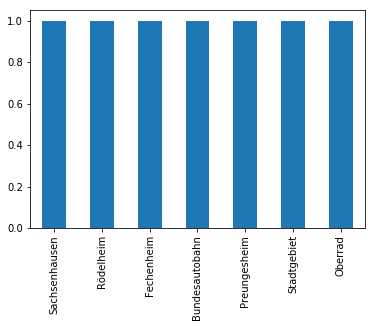

In [8]:
# Counts of published articles by location for an example author
example_author = pub_counts_per_author_and_location.columns[1]
print("Published articles for author {} by location".format(example_author))
pub_counts_per_author_and_location[example_author][pub_counts_per_author_and_location[example_author]!=0].sort_values().plot(kind="bar")

In [9]:
# Top locations for each author
top_locations_by_author = pd.DataFrame(index=[1,2,3])
for author in pub_counts_per_author_and_location.columns:
    top_locations_by_author[author] = pub_counts_per_author_and_location[author].nlargest(n=3).index.sort_values()
top_locations_by_author

,ne,fue,em,ka,12.04.2019
1,Bockenheim,Fechenheim,BAB,Bundesautobahn,Nordend
2,Nordend,Rödelheim,Gallus,Griesheim,Rödelheim
3,Sachsenhausen,Sachsenhausen,Sachsenhausen,Sachsenhausen,Sachsenhausen


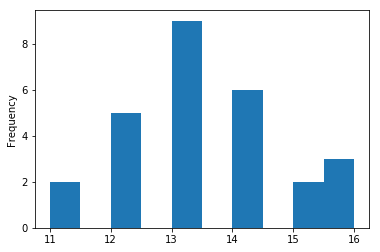

In [10]:
# At which times are articles published?
pub_hours = berichte["Timestamp"].dt.hour
pub_hours.plot(kind="hist")

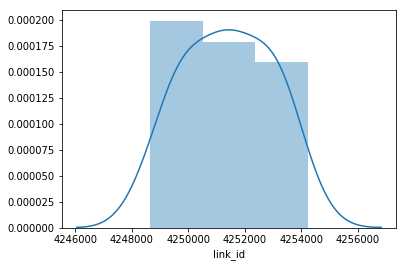

In [11]:
# Distribution of the article Link IDs
link_ids = pd.DataFrame({"link_id": [link[-7:] for link in berichte["Link"]]})
link_ids = link_ids.astype(int)
ax = sns.distplot(link_ids["link_id"])